In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pysfmov as sfmov
import FLife
from tqdm import tqdm
import cv2

In [2]:
filename = './data/rec.sfmov'
fs = 400
dt = 1 / fs

data = sfmov.get_data(filename)
km = 1.2 * 10**(-8) 
stress = 10 * (data / km ) * 10**-6 # stress in MPa

location = 39,79,3,3 #vert mode area 
f = 55 # [54, 56] # HZ

In [3]:
class ThermalData():
        
    def __init__(self, x, dt):
        
        self.x = x
        self.dt = dt
    
    def _find_nearest(self, array, value):
        
        array = np.asarray(array)
        idx = (np.abs(array - value)).argmin()
        
        return array[idx], idx
    
    def _pixel_selection(event):
        
        pos.append([event.xdata,event.ydata])
        
        if len(pos) == 2:
            f.canvas.mpl_disconnect(cid)
    
    def nfi(self):
        
        N = self.x.shape[0]
        ds = self.x - self.x[0,:,:]
        
        
        f,a = plt.subplots()
        a.imshow(np.abs(fft[0,:,:]))
        pos = []
        cid = f.canvas.mpl_connect('button_press_event', _pixel_selection)
        f.show()
        
        #if location is not None:
            #(x, y, w, h) = location    
            #ds = ds[:, y:(y+h), x:(x+w)]
                
        fft = np.abs(np.fft.rfft(ds, N, axis = 0) * 2 / N)
        freq = np.fft.rfftfreq(N, dt)
        
        #y_peak = np.max(fft[(freq >= fstep[0]) & (freq <= fstep[1])], axis = 0)
        #x_peak = np.where(fft == y_peak)
        
        return np.abs(fft), freq

<IPython.core.display.Javascript object>


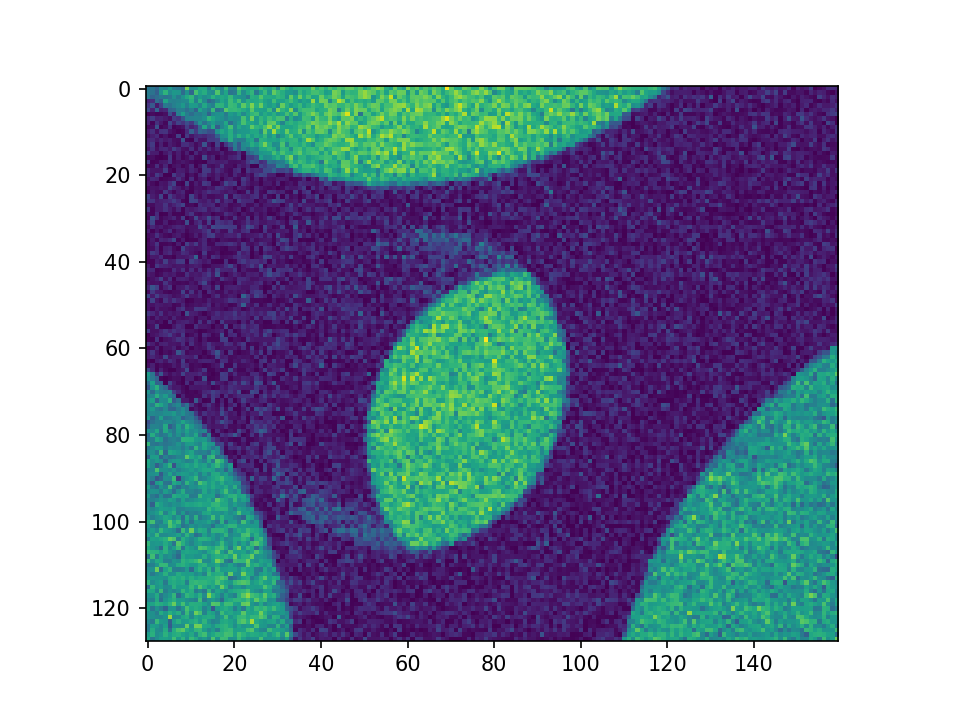

In [18]:
td = ThermalData(stress, dt)
fft, freq = td.nfi()